In [1]:
# ваши импорты
import numpy as np
import pandas as pd
import random
from scipy import stats as st


### Задача 1.

В револьвере вставлены два патрона подряд. Первый участник русской рулетки после выстрела остался жив. Что следует сделать второму участнику: случайно прокрутить барабан перед выстрелом или выстрелить сразу?

В рамках решения этой задачи мы будем сравнивать 2 вероятности:
- остаться в живых, если произвольно покрутил барабан
- остаться в живых, если выстрелил сразу после первого участника

Рассчитаем первую.  
После выстрела в барабане с шестью ячейками все еще два патрона. Второй участник произвольно крутит барабан. Какова вероятность, что он останется в живых после выстрела? Рассчитайте вероятность, обозначьте ее p_1 и выведите значение этой переменной на экран.

In [2]:
p_1 = 2/6
print(p_1)

0.3333333333333333


Чтобы рассчитать вероятность второго события, сформируем множество всех элементарных исходов, обозначая 0 ячейки без путь и X ячейки с пулями:

- X 0 0 0 0 X
- 0 0 0 0 X X
- 0 0 0 X X 0
- 0 0 X X 0 0
- 0 X X 0 0 0
- X X 0 0 0 0

Два из этих исходов не возможны с учетом, что один игрок уже выстрелил и остался в живых. Посчитайте количество оставшихся исходов, а также количество таких, при которых второй игрок выжевет. Рассчитайте итоговую вероятность выжить для второго игрока, если он не будет крутить барабан после первого, запишите ее в переменную p_2 и выведите ее значение на экран.

In [3]:
p_2 = 1/4
print(p_2)

0.25


Сравните полученные вероятности, и скажите, что лучше сделать второму игроку, чтобы выжить.

In [4]:
print(f'Второму игроку лучше не крутить барабан т.к вероятность застрелиться выстрелив сразу = {p_2}, \n \
      а верояность застелистся покрутив барабан =  {p_1}' )

Второму игроку лучше не крутить барабан т.к вероятность застрелиться выстрелив сразу = 0.25, 
       а верояность застелистся покрутив барабан =  0.3333333333333333


### Задача 2. 

Вася вышел пришел на автобусную остановку, чтобы поехать в гости к бабушке в деревню. Он знает, что вероятность того, что автобус приедет за 30 минут, составляет 95%. Но он решил столько не ждать, а вызвать такси, если автобус не приедет в течение пятнадцати минут. Какова вероятность, что Вася не поедет к бабушке на такси?

Сначала давайте ответим на вопрос: какова вероятность того, что автобус НЕ приедет в течение 30 минут? Это событие является противоположным к событию "автобус приедет в течение 30 минут". Посчитайте эту вероятность и запишите в переменную p_1, а затем выведите ее значение на экран.

In [5]:
p_1 = round((1 - 0.95), 2)
print(p_1)

0.05


Теперь давайте порассуждаем. Чтобы случилось событие "автобус не приедет в течение тридати минут", должно произойти три события:
- автобус не приезжает первые 15 минут
- автобус не приезжает вторые 15 минут

Все эти события независимы, то есть вероятность того, что случатся они все, равна произведению их вероятностей. Также их все можно переформулировать в "автобус не приедет в течение 15 минут". Обозначьте эту вероятность p_2, рассчитайте и выведите на экран.

In [6]:
p_2 = round(np.sqrt(p_1), 2)
print(p_2)

0.22


Мы знаем вероятность того, что автобус не приедет в течение 15 минут! Но нам нужна вероятность того, что Вася все таки поедет к бабушке на автобусе. Рассчитайте ее, запишите в переменную p_3 и выведите ее значение на экран.

In [7]:
p_3 = round((1 - p_2), 2)
print(p_3)

0.78


### Задача 3.

С помощью [данных](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset) о весе людей в возрасте 18 лет ответьте на два вопроса:
- у какой доли людей в этом возрасте вес не превышает 50кг?
- какого веса не имеет 70 процентов людей?

In [8]:
# считываем данные, переводим вес в килограммы и оставляем только нужный столбец
data = pd.read_csv('data/SOCR-HeightWeight.csv', sep = ',')
data_1 = pd.DataFrame(columns=['Weight_kg'])
data_1['Weight_kg'] = data['Weight(Pounds)'] * 0.453592
data_1

,Weight_kg
0,51.252494
1,61.909547
2,69.411778
3,64.562199
4,65.452010
...,...
24995,53.538008
24996,54.518674
24997,53.644285
24998,59.995797


<Axes: >

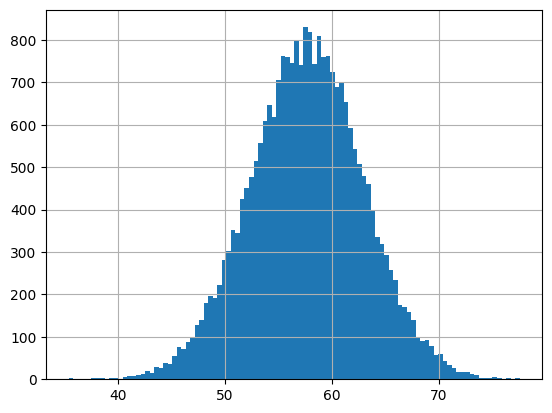

In [10]:
data_1['Weight_kg'].hist(bins=100)

<Axes: >

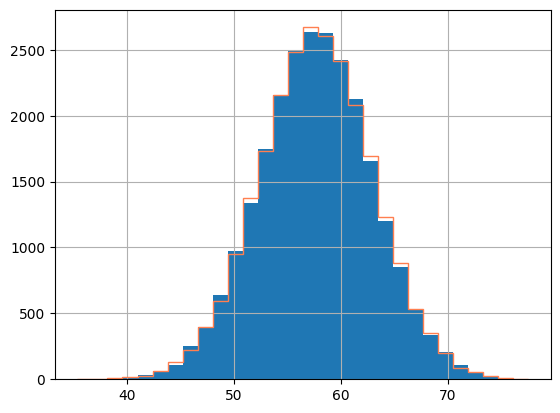

In [11]:
# определяем параметры нормального распределения по имеющейся выборке и визуализируем полученное распределение, чтобы убедиться, что мы все подобрали корректно

# ваш код с определением параметров рапределения и его инициализацией
weight_exp = []
mean_weight =data_1['Weight_kg'].mean()
sigm_weight =data_1['Weight_kg'].std()
for i in range(data_1.shape[0]):
    weight_exp.append(random.normalvariate(mu=mean_weight, sigma=sigm_weight))
weight_exp = pd.Series(weight_exp)

# ваш код с визуализацией, подтверждующей соответствие распределения исходным данным
weight_range = [data_1['Weight_kg'].min(), data_1['Weight_kg'].max()]

data_1['Weight_kg'].hist(bins=30, range=weight_range)
weight_exp.hist(bins=30, histtype='step', color='coral', range=weight_range)

Вероятность того, что вес не превышает 50кг?

In [12]:
# ваш код
weight_distr = st.norm(mean_weight, sigm_weight)
1 - weight_distr.cdf(50)

0.925749413854135

Какого веса не имеет 70% людей?

In [13]:
# ваш код
#не совсем понял вопрос
ma = weight_distr.ppf(0.7) # 
mi = weight_distr.ppf(1-0.7) #
pop_max = weight_distr.ppf(0.85)
pop_min = weight_distr.ppf(1 - 0.85)
print(f'Если считать от самых худых то: {ma} \n' \
      f'Если считать от самых полных то: {mi} \n' \
      f'Если считать по популярности значения то: меньше {pop_min} и больше {pop_max}\n')

Если считать от самых худых то: 60.415915111149374 
Если считать от самых полных то: 54.8685024951898 
Если считать по популярности значения то: меньше 52.16021219833347 и больше 63.12420540800571

